# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [1]:

import pandas as pd

# Load the dataset
df = pd.read_csv('bankmarketing.csv')

# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types of each column
print("\nData Types:\n", df.dtypes)




Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y               

In [3]:

# Summary statistics
# Summary statistics for numerical columns
print(df.describe())




               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

C:\Users\tejes\AppData\Local\Temp\ipykernel_21816\2770587584.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='Set2')


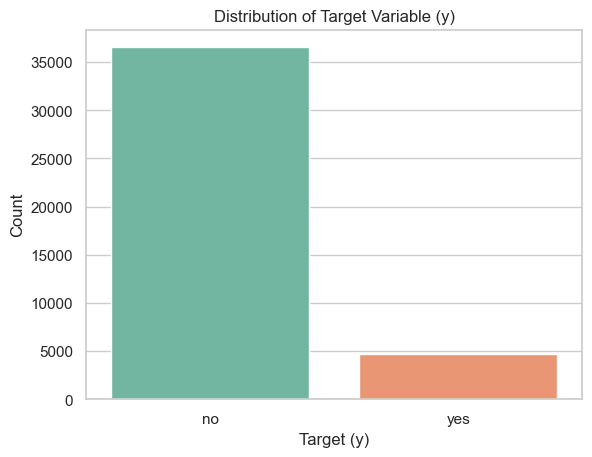

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Plot the distribution of the target variable (assuming it's named 'y')
sns.countplot(data=df, x='y', palette='Set2')

# Add labels and title
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target (y)')
plt.ylabel('Count')

# Show the plot
plt.show()


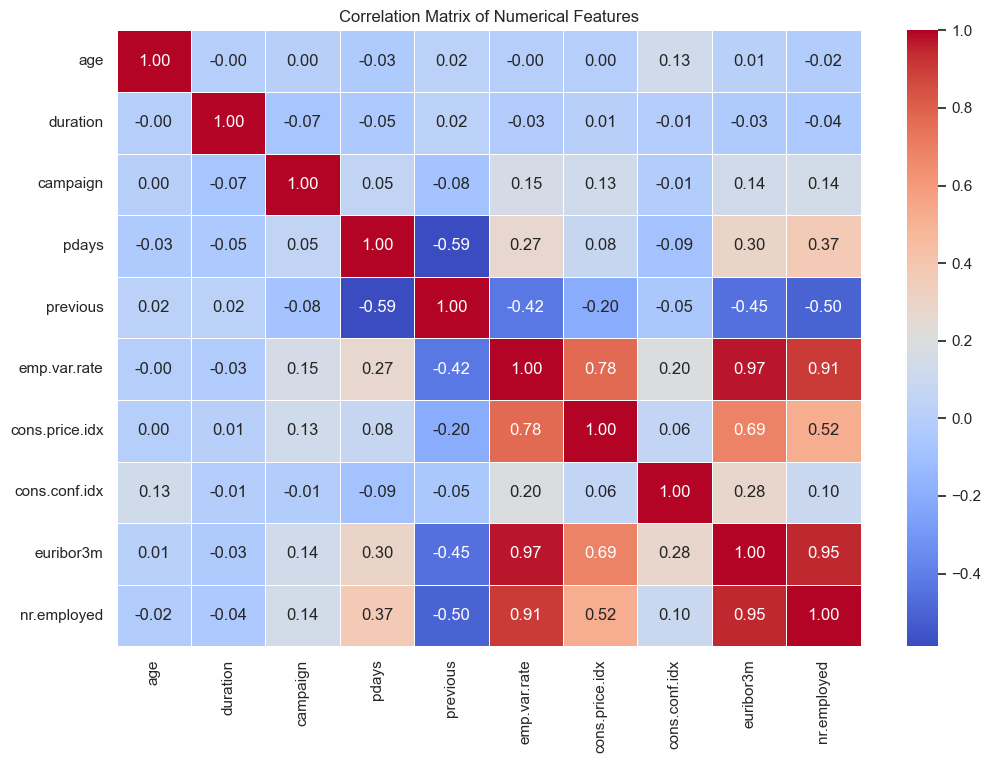

In [5]:

# Correlation matrix for numerical features

import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Ensures only numeric columns are used

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Numerical Features')

# Show the plot
plt.show()


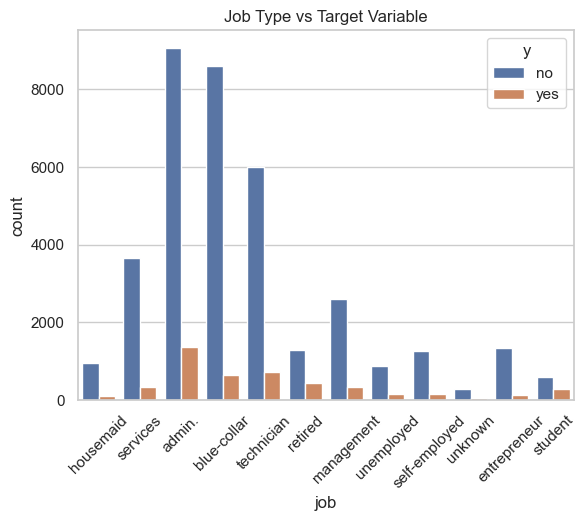

In [6]:
sns.countplot(data=df, x='job', hue='y')
plt.title('Job Type vs Target Variable')
plt.xticks(rotation=45)
plt.show()


In [7]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['education'], df['y'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square test p-value: {p}")


Chi-square test p-value: 3.3051890144025054e-38


In [8]:
df.describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
age,40.024060,10.421250,17.000,98.000
duration,258.285010,259.279249,0.000,4918.000
campaign,2.567593,2.770014,1.000,56.000
pdays,962.475454,186.910907,0.000,999.000
previous,0.172963,0.494901,0.000,7.000
emp.var.rate,0.081886,1.570960,-3.400,1.400
cons.price.idx,93.575664,0.578840,92.201,94.767
cons.conf.idx,-40.502600,4.628198,-50.800,-26.900
euribor3m,3.621291,1.734447,0.634,5.045
nr.employed,5167.035911,72.251528,4963.600,5228.100



## Conclusion

In this analysis, I explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
